# Initialize Notebook

**Scope of this notebook:** I will only proceed with importing the neccesary libraries and dataset to perform a quick EDA

In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


## Data Inspection

In [3]:
# Check column names in case 
# we need to do some spelling correction
dataset.columns

Index(['RID', 'Gender', 'Ageatscreening', 'Diagnosis', 'MMSE0m',
       'HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')

In [4]:
# Check dataset overall information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RID                         608 non-null    int64  
 1   Gender                      608 non-null    int64  
 2   Ageatscreening              608 non-null    float64
 3   Diagnosis                   608 non-null    int64  
 4   MMSE0m                      605 non-null    float64
 5   HipsASMbaseline             583 non-null    float64
 6   HipsContrastbaseline        594 non-null    float64
 7   HipsCorelationbaseline      588 non-null    float64
 8   HipsVariancebaseline        600 non-null    float64
 9   HipsSumAveragebaseline      607 non-null    float64
 10  HipsSumVariancebaseline     601 non-null    float64
 11  HipsEntropybaseline         585 non-null    float64
 12  HipsClusterShadebaseline    590 non-null    float64
 13  ERCsASMbaseline             604 non

In [5]:
# Check for nulls
dataset.isna().sum()

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
MMSE0m                         3
HipsASMbaseline               25
HipsContrastbaseline          14
HipsCorelationbaseline        20
HipsVariancebaseline           8
HipsSumAveragebaseline         1
HipsSumVariancebaseline        7
HipsEntropybaseline           23
HipsClusterShadebaseline      18
ERCsASMbaseline                4
ERCsContrastbaseline          18
ERCsCorelationbaseline        28
ERCsVariancebaseline          14
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsEntropybaseline            9
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
ERCsVolumebaseline            14
HipposcampusVolumebaseline    19
dtype: int64

<Axes: >

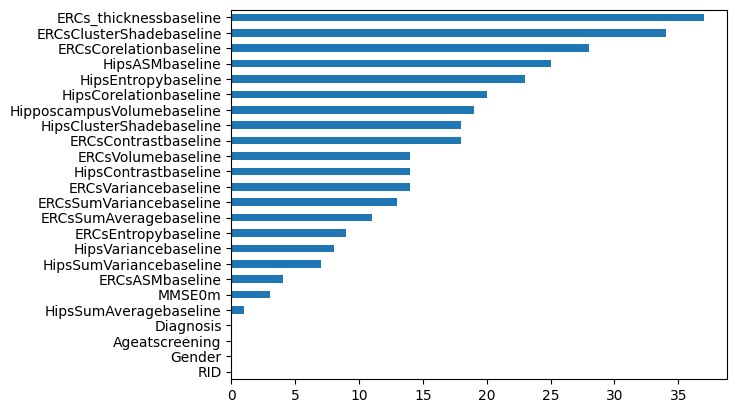

In [6]:
missing_data = dataset.isna().sum().sort_values()
missing_data.plot(kind='barh')

In [7]:
# Check for duplicated instances
dataset.duplicated().sum()

np.int64(0)

In [8]:
# Quick descriptive overview
dataset.describe(include = "all")

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
count,608.000000,608.000000,608.000000,608.000000,605.000000,583.000000,594.000000,588.000000,600.000000,607.000000,...,590.000000,580.000000,594.000000,597.000000,595.000000,599.000000,574.000000,571.000000,594.000000,589.000000
mean,732.986842,0.453947,75.492206,1.246711,26.852893,0.116003,179.069158,0.540629,200.456833,38.803855,...,226.470373,0.490707,222.096700,30.116097,660.464773,2.931352,1531.264216,2.771926,1697.378788,3223.843803
std,399.174416,0.498285,6.689691,1.119686,2.739189,0.040795,20.671230,0.050105,24.725191,5.032667,...,24.052848,0.047388,9.942083,3.232780,37.561281,0.209283,3084.641172,0.321123,391.721129,516.377557
min,2.000000,0.000000,55.205500,0.000000,16.000000,0.050000,122.020000,0.410000,129.360000,25.640000,...,163.010000,0.360000,195.940000,22.250000,554.630000,2.370000,-4665.130000,1.930000,830.000000,1782.000000
25%,416.750000,0.000000,71.452075,0.000000,25.000000,0.080000,164.747500,0.510000,183.615000,35.715000,...,209.862500,0.460000,215.775000,27.870000,635.670000,2.800000,-843.925000,2.560000,1398.250000,2828.000000
50%,751.500000,0.000000,75.706850,1.000000,27.000000,0.110000,178.710000,0.550000,207.025000,38.860000,...,224.710000,0.490000,222.540000,29.950000,664.470000,2.930000,1016.430000,2.780000,1706.500000,3225.000000
75%,1067.000000,1.000000,80.208925,2.000000,29.000000,0.140000,193.230000,0.580000,219.967500,42.495000,...,242.180000,0.530000,229.410000,32.290000,689.560000,3.080000,3605.522500,2.970000,2005.750000,3603.000000
max,1427.000000,1.000000,90.989000,3.000000,30.000000,0.230000,235.890000,0.680000,247.020000,51.890000,...,290.400000,0.600000,249.930000,38.930000,755.270000,3.500000,10334.290000,3.600000,2750.000000,4605.000000


## Target analysis

Lets have a quick look at the target

In [121]:
dataset["Diagnosis"].value_counts().sort_index()

Diagnosis
0    194
1    200
2     84
3    130
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

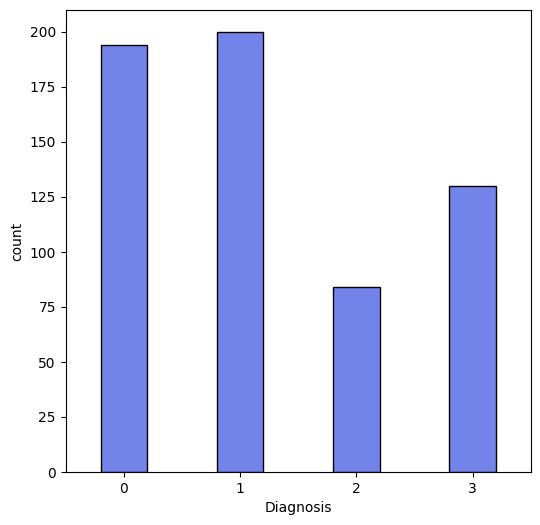

In [128]:
# Plot the target using a bar plot
plt.figure(figsize = (6,6))

sns.countplot(data = dataset, 
              x = dataset["Diagnosis"].sort_index(),
              color = "#5e76fe",
              width = 0.4,
              edgecolor = "black",
)

**We can see at first glance that we have an imbalance dataset.** 

## Diving deeper - MMSE0m Variable
From our previous meeting, **column E was MMSE0m** and it was stated that it is an important variable. So we will pay extra attention to that variable.

As such, how about we check
* Q1) Total unique values for each MMSE0m score?
* Q2) Total values for each MMSE0m score per Diagnosed group?
* Q3) Total number of diagnosed people by gender?
* Q4) Total number of males and females who took the MMSE0m
* Q5) Lets find the Average MMSE0m per Gender and Diagnosed groups
* Q6) Lets find the average Age per Diagnosed group
* Q7) Lets find the avegage Age per Diagnosed group with different MMSE0M scores

In [204]:
dataset["Gender"].value_counts().sort_index()

Gender
0    332
1    276
Name: count, dtype: int64

**Q1) Total unique values for each MMSE0m score?**

In [120]:
dataset[["MMSE0m"]].value_counts().sort_values(ascending = False)

MMSE0m
29.0      123
30.0      103
28.0       76
26.0       69
25.0       59
27.0       58
24.0       45
23.0       23
21.0       20
20.0       14
22.0       12
19.0        1
16.0        1
18.0        1
Name: count, dtype: int64

Total number of unique values in MMSE0M 16246.0


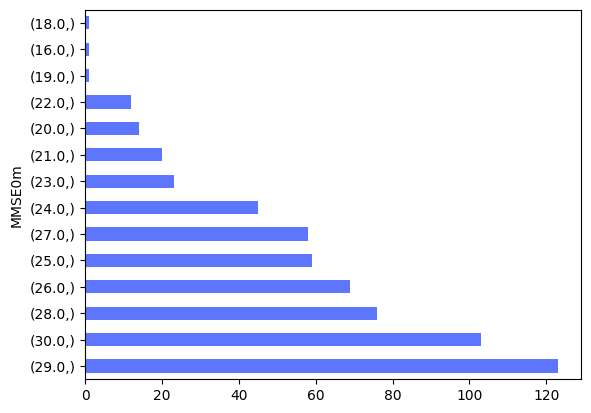

In [112]:
# Check for unique values in MMSE0m 
dataset[["MMSE0m"]].value_counts().sort_values(ascending = False).plot(kind ="barh",
                                                                       color="#5e76fe")

print(f"Total number of unique values in MMSE0M {dataset["MMSE0m"].sum()}")

It appears that we have 14 unique values for MMSE0m scoring. Now how about we check the **MMSE0m** scores for each **Diagnosis** group

**Q2) Total values for each MMSE0m score per Diagnosed group?**

In [136]:
dataset[["Diagnosis", "MMSE0m"]].value_counts().sort_index()

Diagnosis  MMSE0m
0          25.0       1
           26.0       5
           27.0       6
           28.0      29
           29.0      71
           30.0      82
1          19.0       1
           24.0      13
           25.0      26
           26.0      29
           27.0      35
           28.0      37
           29.0      40
           30.0      17
2          23.0       1
           24.0      13
           25.0      15
           26.0      14
           27.0      15
           28.0      10
           29.0      12
           30.0       4
3          16.0       1
           18.0       1
           20.0      14
           21.0      20
           22.0      12
           23.0      22
           24.0      19
           25.0      17
           26.0      21
           27.0       2
Name: count, dtype: int64

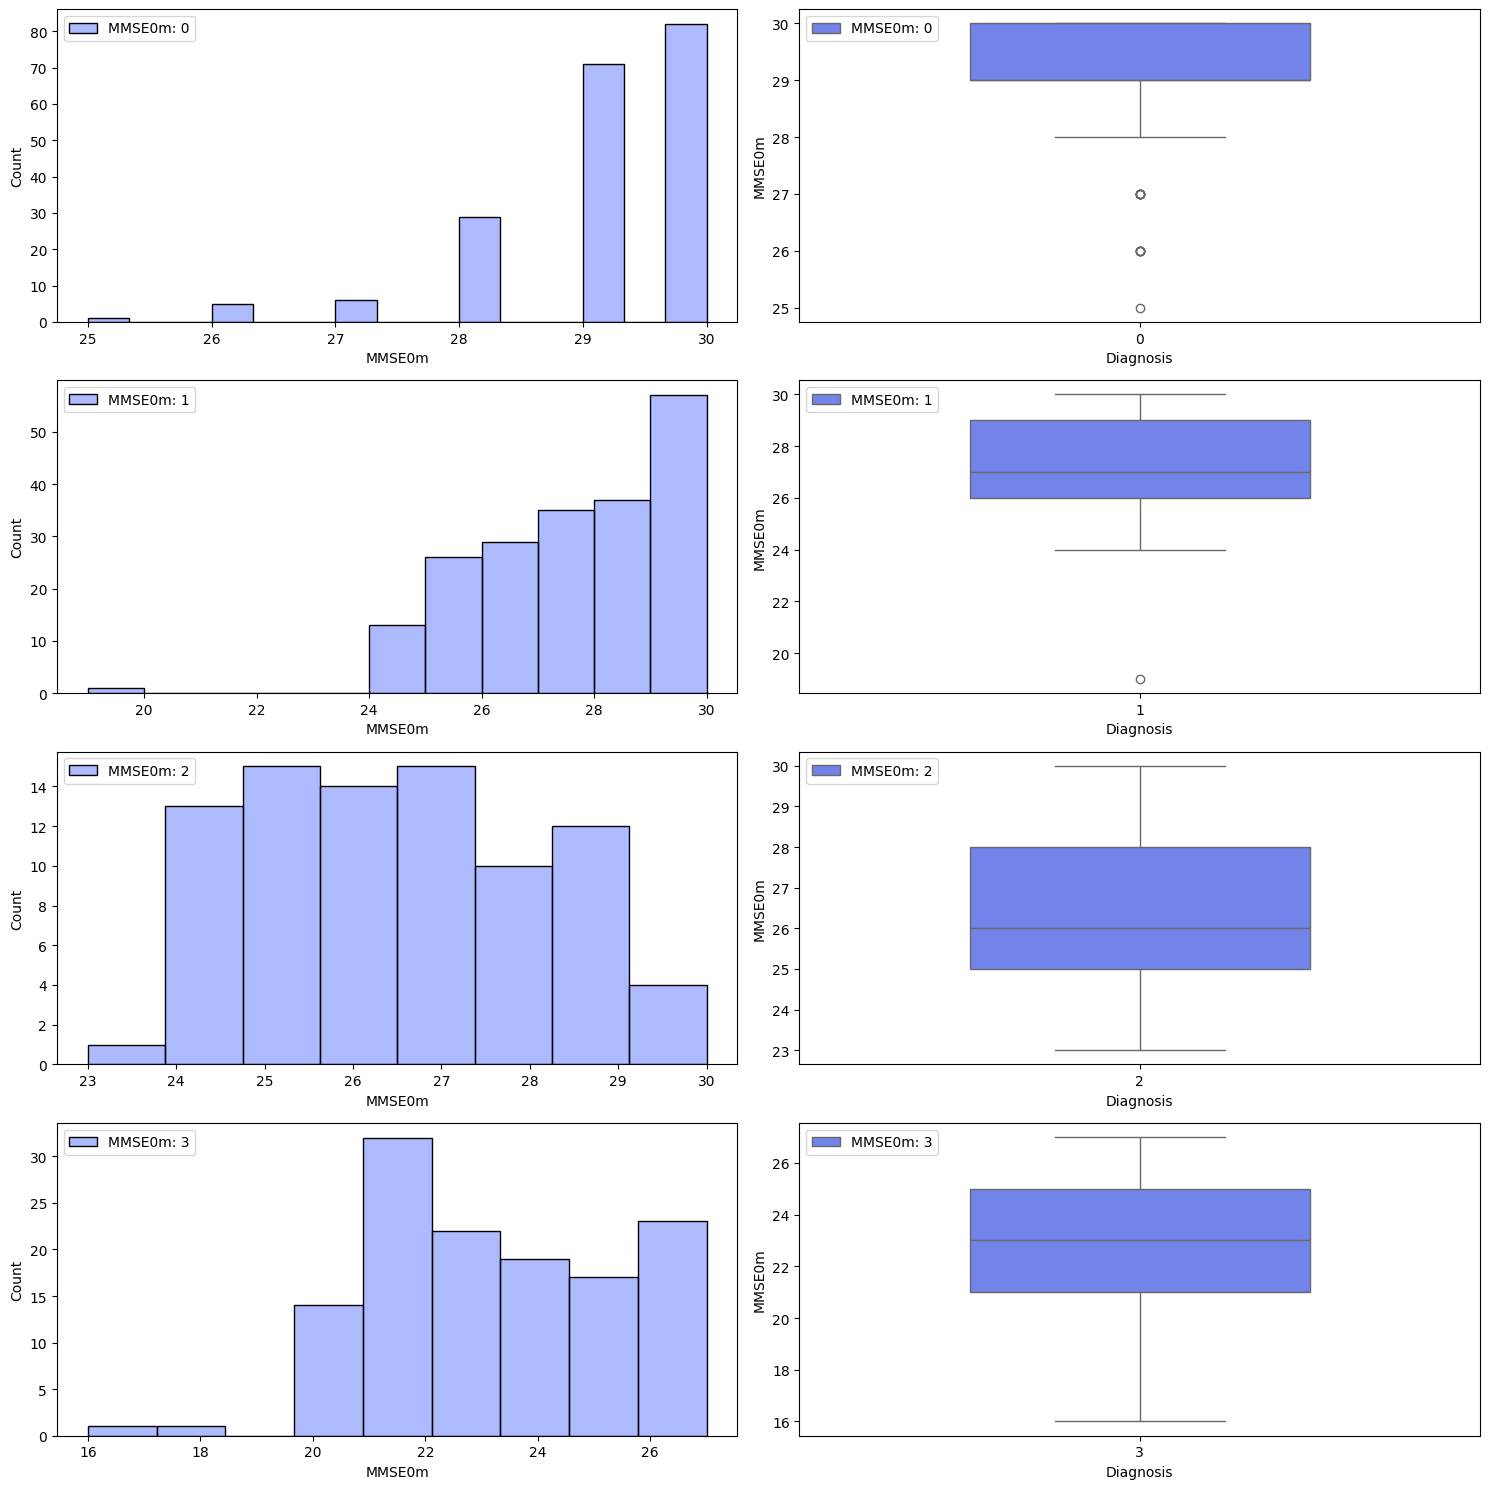

In [12]:
# Plot MMSE0m_counts per group
plt.figure(figsize=(15,15))
custom_palette = ["#5e76fe"]

for i in range(dataset["Diagnosis"].nunique()):
    plt.subplot(4, 2, 2*i + 1)
    sns.histplot(dataset[dataset["Diagnosis"] == i],
                x="MMSE0m",
                hue="Diagnosis",
                palette=custom_palette,
                label=f"MMSE0m: {i}" 
    )
    plt.legend(loc="upper left")

    plt.subplot(4, 2, 2*i + 2)
    sns.boxplot(dataset[dataset["Diagnosis"] == i],
                x="Diagnosis",
                y="MMSE0m",
                color="#5e76fe",
                width=.5,
                label=f"MMSE0m: {i}" 
    )
    plt.legend(loc="upper left")
    
plt.tight_layout()

We can see a lot of variation in terms of MMSE0m scores on group 3

**Q3) Total number of diagnosed people by gender?**

In [111]:
dataset[["Diagnosis", "Gender"]].value_counts().sort_index()

Diagnosis  Gender
0          0          96
           1          98
1          0         127
           1          73
2          0          49
           1          35
3          0          60
           1          70
Name: count, dtype: int64

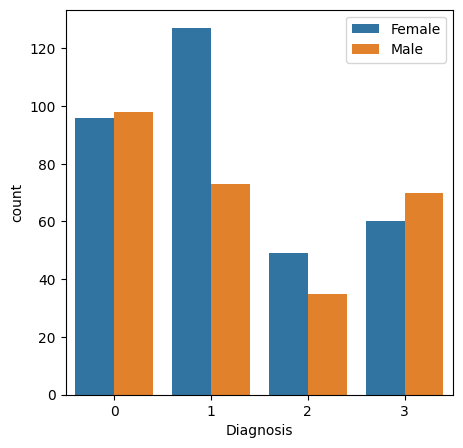

In [101]:
# Plot number of diagnosed people by gender
plt.figure(figsize=(5, 5))

sns.countplot(dataset, x = "Diagnosis", hue = "Gender")
plt.legend(loc="upper right", labels=["Female", "Male"])

**Q4) Total number of males and females who took the MMSE0m**

In [141]:
dataset[["MMSE0m", "Gender"]].value_counts().sort_index()

MMSE0m  Gender
16.0    1          1
18.0    0          1
19.0    0          1
20.0    0          8
        1          6
21.0    0         10
        1         10
22.0    0          5
        1          7
23.0    0         11
        1         12
24.0    0         22
        1         23
25.0    0         32
        1         27
26.0    0         38
        1         31
27.0    0         35
        1         23
28.0    0         46
        1         30
29.0    0         64
        1         59
30.0    0         56
        1         47
Name: count, dtype: int64

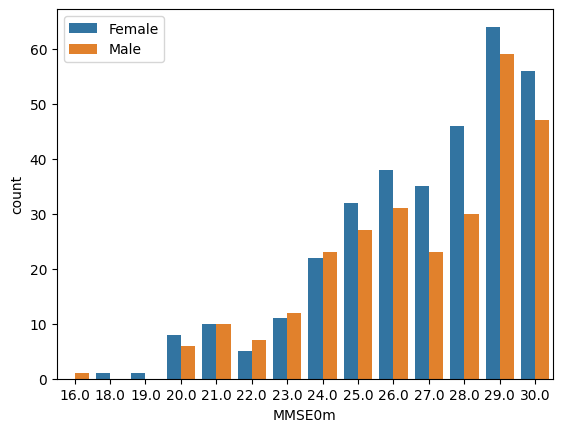

In [99]:
sns.countplot(data = dataset, x="MMSE0m", hue="Gender")
plt.legend(loc="upper left", labels=["Female", "Male"])

**Q5) Lets find the Average MMSE0m per Gender and Diagnosed groups**

In [172]:
dataset.groupby(by=["Diagnosis", "Gender"]).agg("MMSE0m").mean()


Diagnosis  Gender
0          0         29.062500
           1         29.163265
1          0         27.176000
           1         27.246575
2          0         26.775510
           1         26.142857
3          0         22.983051
           1         23.271429
Name: MMSE0m, dtype: float64

([<matplotlib.axis.XTick at 0x17c01465490>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

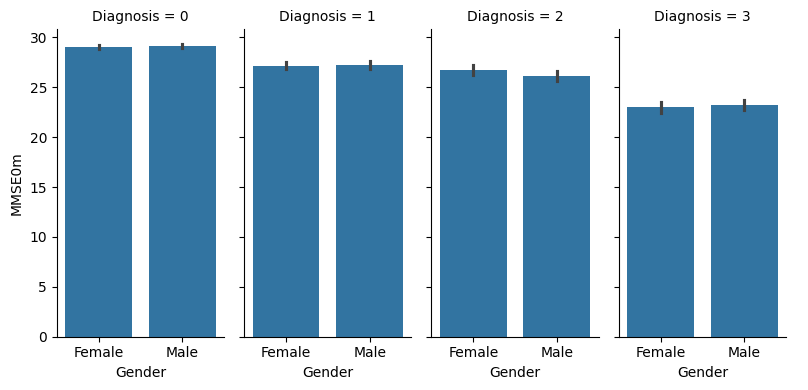

In [173]:
# Plot the total number of males and females who took the MMSE0m
g = sns.catplot(data = dataset, 
            kind="bar", 
            x="Gender", 
            y="MMSE0m", 
            col="Diagnosis", 
            height=4, 
            aspect=.5,
            estimator="mean"
)
plt.xticks([0, 1], ['Female', 'Male'])

Lets use boxplots here for any outliers

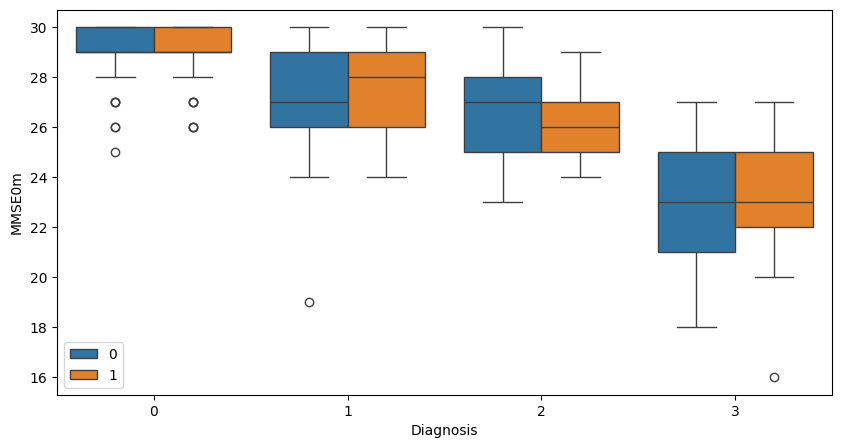

In [175]:
plt.figure(figsize=(10,5))

sns.boxplot(dataset, x="Diagnosis", y="MMSE0m", hue="Gender")
plt.legend(loc="lower left")

**Q6) Lets find the average Age per Diagnosed group**

In [184]:
dataset.groupby(by=["Diagnosis"])["Ageatscreening"].agg(["mean"])

,mean
Diagnosis,
0,76.175241
1,74.745369
2,74.880943
3,76.016856


<Axes: xlabel='Ageatscreening'>

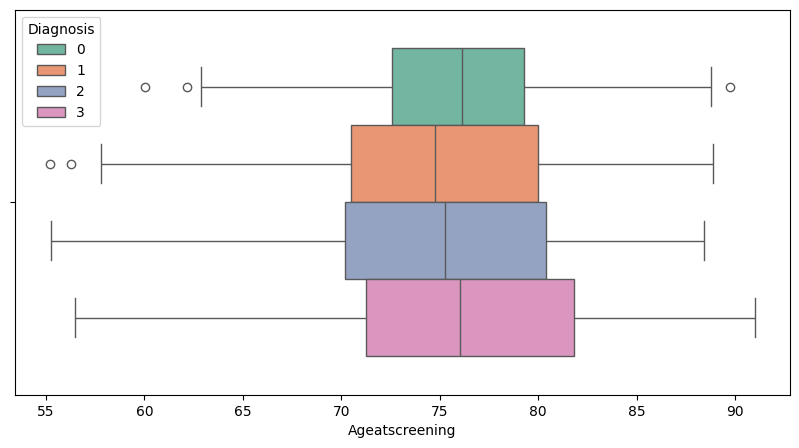

In [43]:
plt.figure(figsize=(10,5))

sns.boxplot(data=dataset, x="Ageatscreening", hue="Diagnosis", palette="Set2")

**Q7) Lets find the avegage Age per Diagnosed group with different MMSE0M scores**

In [194]:
dataset.groupby(by=["Diagnosis", "MMSE0m"])["Ageatscreening"].agg(["mean"])

mean
Diagnosis MMSE0m           
0         25.0    70.616400
          26.0    78.545760
          27.0    79.336517
          28.0    76.059324
          29.0    76.389307
          30.0    75.722820
1         19.0    79.876700
          24.0    76.112315
          25.0    75.143196
          26.0    75.678234
          27.0    73.891589
          28.0    75.633981
          29.0    73.891305
          30.0    74.194518
2         23.0    83.238400
          24.0    78.172715
          25.0    73.955067
          26.0    74.174771
          27.0    74.631427
          28.0    74.782730
          29.0    75.070558
          30.0    68.649325
3         16.0    77.361600
          18.0    82.232900
          20.0    78.212907
          21.0    76.210405
          22.0    76.867558
          23.0    73.439732
          24.0    74.711316
          25.0    74.122965
          26.0    78.160595
          27.0    85.642500

<Axes: xlabel='Diagnosis', ylabel='Ageatscreening'>

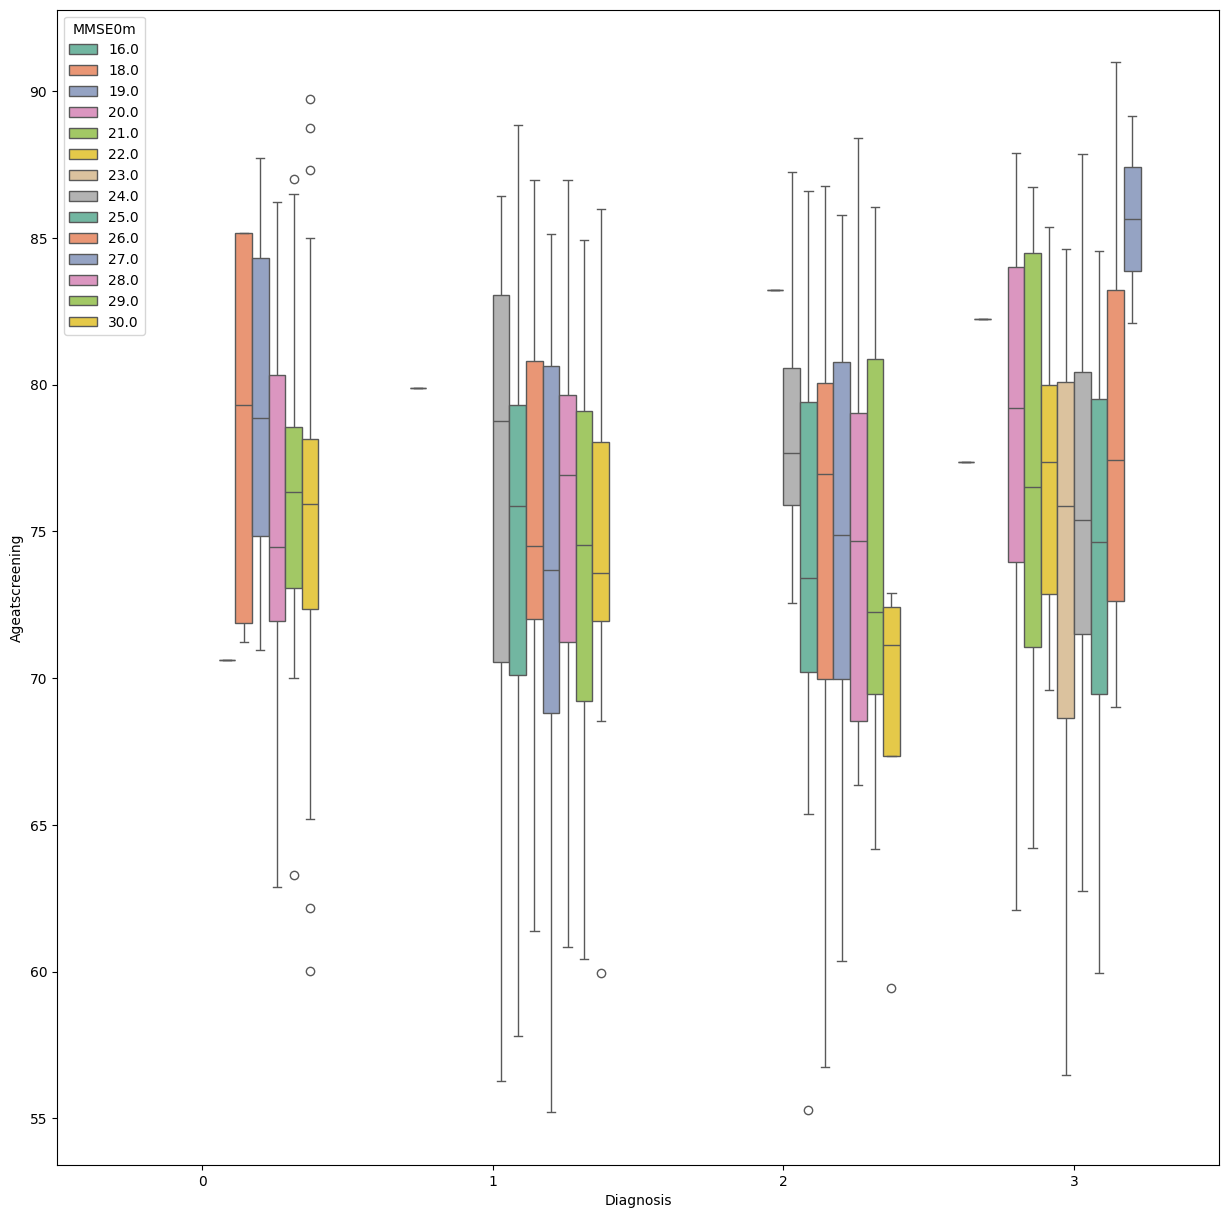

In [56]:
plt.figure(figsize=(15, 15))
sns.boxplot(
    data=dataset,
    x="Diagnosis",
    y="Ageatscreening",
    hue="MMSE0m",
    palette="Set2",
)

Questions have been answered! Now lets move into a broader point of view.

To check variances, we often use plots that visually compare the spread of data across groups or variables. Here are common plots and how to create them: